In [1]:
import requests
import base64
import matplotlib.pyplot as plt
import json

In [2]:
# First, getting access to spotify api
# https://developer.spotify.com/documentation/general/guides/authorization-guide/#client-credentials-flow

payload = {'grant_type': 'client_credentials'}
authorization_string = b'bf4b8a023ac94e42982af4219f7e876c:629434d13e1140999d864cc8f7bdb1b1'
headers = {'Authorization': b'Basic ' + base64.b64encode(authorization_string)}

r = requests.post("https://accounts.spotify.com/api/token", data=payload, headers=headers)
print(r.json())
access_token = r.json()['access_token']

{'access_token': 'BQBNIa7UJSZH7xzF51ePmohVsV1F0A49JOyBimOX1ZwVadU7ZuPAw-Po83bae3Pd1VpI7K91stI3YUFYUx8', 'token_type': 'Bearer', 'expires_in': 3600, 'scope': ''}


In [7]:
# https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/

url = 'https://api.spotify.com/v1/audio-analysis/5LDpyuhPRIGt3PJaHKcMPN'
headers = {'Authorization': 'Bearer ' + access_token}

r = requests.get(url, headers=headers)
json_data = r.json()
# r.json()

Displaying beats


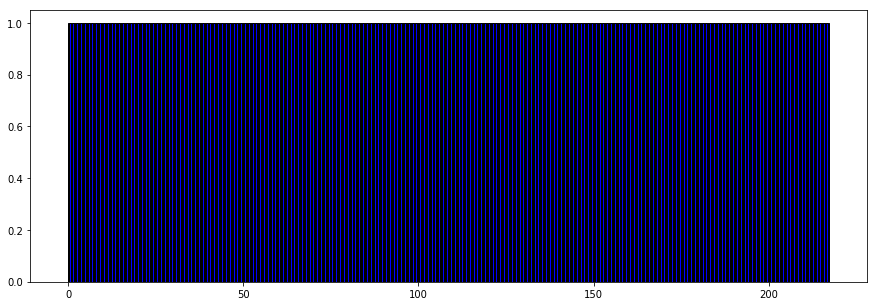

Displaying bars


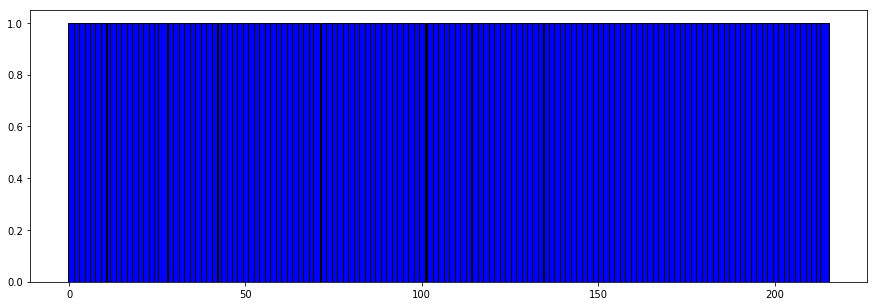

Displaying segments


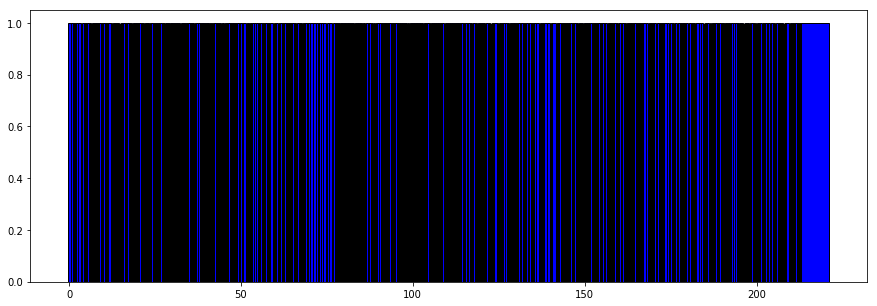

Displaying sections


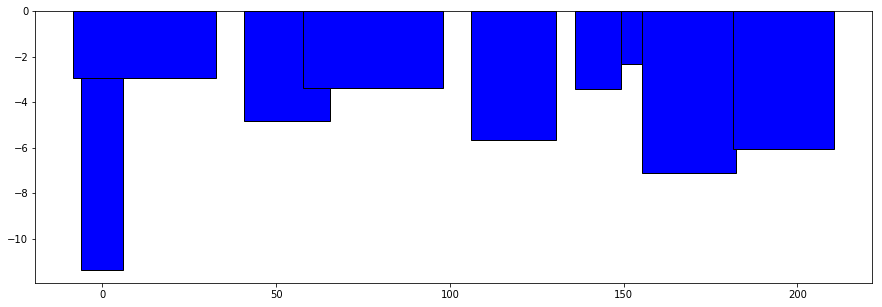

Tempo in sections


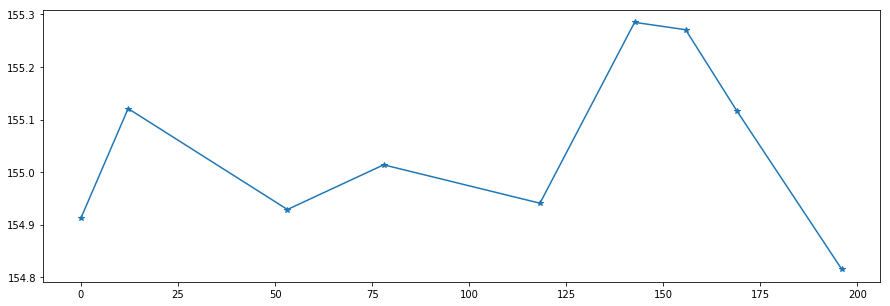

In [8]:
def data_extractor(json_data, data_type, values_to_extract):
    data_to_return = {}
    for d in json_data[data_type]:
        i = 0
        for v in values_to_extract:
            if v not in data_to_return:
                data_to_return[v] = []
            if v in d:
                data_to_return[v].append(d[v])
            i+=1
                
    return data_to_return

for data_type in ['beats', 'bars', 'segments', 'sections']: #'tatums'
    data_to_plot = data_extractor(json_data, data_type, ['start', 'duration', 'confidence', 'loudness', 'tempo'])
    print("Displaying " + data_type)
    plt.figure(figsize=(15,5))
    
    plot_height = 1
    if data_type == "sections": plot_height = data_to_plot['loudness']
    
    plt.bar(data_to_plot['start'], height=plot_height, width=data_to_plot['duration'], facecolor='b' , edgecolor='k')
    plt.show()
    if data_type == 'sections':
        print("Tempo in sections")
        plt.figure(figsize=(15,5))
        # plt.ylim((130, 135))
        plt.plot(data_to_plot['start'], data_to_plot['tempo'], marker="*")
        plt.show()

Segment pitches


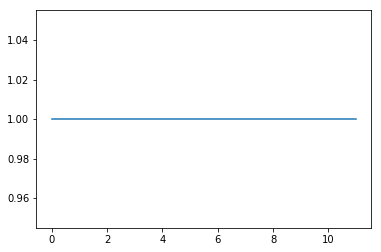

In [9]:
print("Segment pitches")
pitches = []
for val in json_data['segments']:
    for p in val['pitches']:
        pitches.append(p)
    break
        
    
plt.plot(pitches)